In [2]:
import pandas as pd
url = 'D:\Analytics\GitProjects\Datasets\pima-indians-diabetes.csv'


In [3]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']

pima = pd.read_csv(url,header=None,names= col_names)

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
feature_cols = ['pregnant','insulin','bmi','age']
X = pima[feature_cols]
y = pima.label

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
y_pred_class = logreg.predict(X_test)

In [9]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

0.692708333333


In [10]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [11]:
1 - y_test.mean()

0.6770833333333333

In [12]:
max(y_test.mean(),1-y_test.mean())

0.6770833333333333

In [13]:
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: label, dtype: float64

In [14]:
print('True:',y_test.values[0:25])
print('Pred:',y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


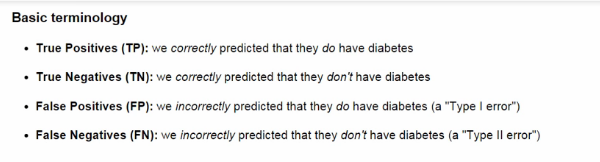

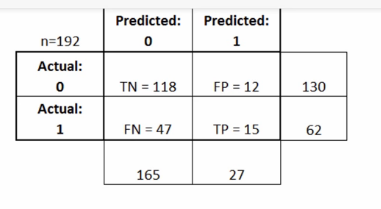

In [15]:
confusion = metrics.confusion_matrix(y_test,y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [16]:
#QUE TAN SEGUIDO ACERTAMOS A LA CLASE
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test,y_pred_class))

0.692708333333
0.692708333333


In [17]:
#QUE TAN SEGUIDO LE PIFIA
print((FP + FN) / float(TP + TN + FP + FN))
print(1-metrics.accuracy_score(y_test,y_pred_class))

0.307291666667
0.307291666667


In [18]:
#SENSITIVIDAD --- cuando el valor real es positivo, cuantas veces acierto?

print(TP/ float(TP + FN))
print(metrics.recall_score(y_test,y_pred_class))

0.241935483871
0.241935483871


In [19]:
#ESPECIFIDAD --- cuando el valor real es negativo, cuantas veces digo que es negativo?

print(TN/ float(TN + FP))


0.907692307692


In [20]:
# FALSE POSITIVE RATE -- cuando el valor real es negatvio, que tan seguido 
# la predicciones incorrecta
print(FP / float(TN + FP))

0.0923076923077


In [21]:
#PRECISION -- cuando un valor positivo es predicho, que tan seguido la
# predicción es correcta (o sea que el valor real sea ese)
print(TP / float( TP + FP))
print(metrics.precision_score(y_test,y_pred_class))

0.555555555556
0.555555555556


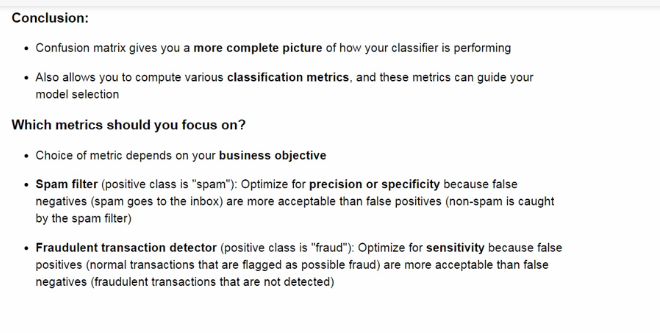

ajustar la performance de la clasificación, teniendo en cuenta los umbrales

In [22]:
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [23]:
#de los primeros 10, muestra las probabilidades predichas para cada clase,
# la primer columna(clase) = 0, la seguda clase es 1
logreg.predict_proba(X_test)[0:10, : ]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [24]:
# ahora la probabilidad para la clase 1
logreg.predict_proba(X_test)[0:10,1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [78]:
y_pred_prob = logreg.predict_proba(X_test)[:,]

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0,0.5,'Frecuencia')

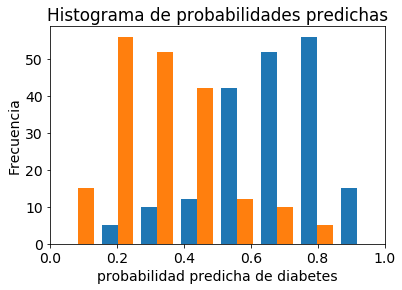

In [80]:
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)
plt.title('Histograma de probabilidades predichas')
plt.xlabel('probabilidad predicha de diabetes')
plt.ylabel('Frecuencia')

In [28]:
# se ve que hay poca probabilidad que prediga diabetes..

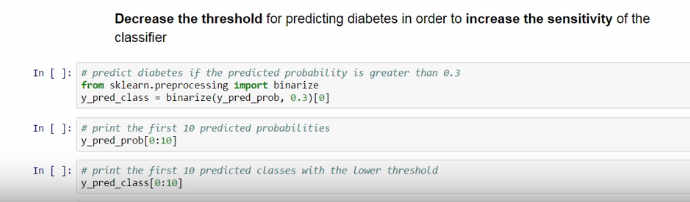

In [92]:
y_pred_prob[:10]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [88]:
# predecir la diabetes si la probabilidad es mayor a 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob,.3)

In [99]:
y_pred_class[0:10,1]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [102]:
y_pred_prob[0:10,0]

array([ 0.63247571,  0.71643656,  0.71104114,  0.5858938 ,  0.84103973,
        0.82934844,  0.50110974,  0.48658459,  0.72321388,  0.32810562])

In [104]:
print(confusion)

[[118  12]
 [ 47  15]]


In [107]:
print(metrics.confusion_matrix(y_test,y_pred_class[:,1]))

[[80 50]
 [16 46]]


In [109]:
#sensitividad
print(46 / float (46+16))


0.7419354838709677


In [111]:
#especifidad
print(80 / float(80+50))

0.6153846153846154


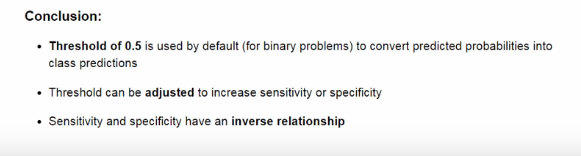

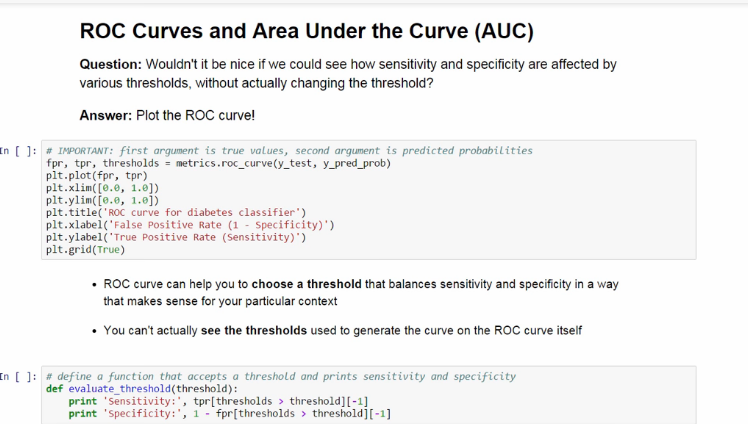

In [114]:
#para la curva ROC, el primer arg es TRUE VALUES, y para el 
#segundo arg es la probabilidad (NO la clase predicha)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob[:,1])

Text(0,0.5,'True positive rate .Sensitividad')

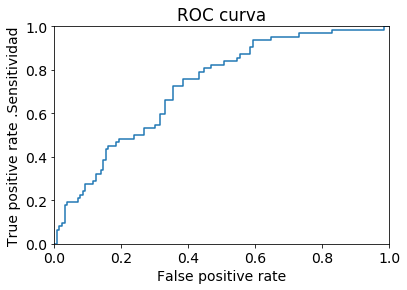

In [118]:
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curva')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate .Sensitividad')

In [128]:
#la contra es que no se puede ver el threshoold mismo, para eso creamos una funcion
def evaluate_threshold(threshold):
    print('Sensitivity',tpr[thresholds > threshold][-1])
    print('Specifity',1-fpr[thresholds > threshold][-1])

In [129]:
evaluate_threshold(0.5)

Sensitivity 0.241935483871
Specifity 0.907692307692


In [130]:
evaluate_threshold(0.3)

Sensitivity 0.725806451613
Specifity 0.615384615385


In [133]:
print(metrics.roc_auc_score(y_test,y_pred_class[:,1]))

0.678660049628


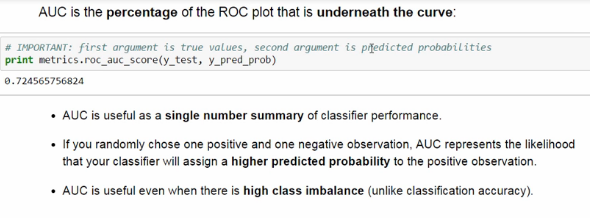


In [134]:
#también se puede usar ROC_AUC como metrica para medir evaluacion, no solo
# el accuracy
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg,X,y,cv=10,scoring="roc_auc").mean()

0.73782336182336183

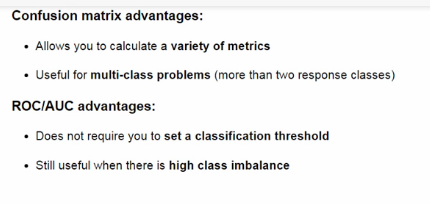